# Task #3 : Exploratory Data Analysis - Retail

### Author: Sahil Raina

## Tasks : 
* Perform Exploratory Data Analysis (EDA) on dataset ‘SampleSuperstore’

* As a business manager, find the weak areas to work to make more profit


# Contents: 

* **Data Collection**
* **Interpreting Data**
* **Data Pre-processing**
* **Exploratory Data Analysis (EDA)**
    1. Correlation Heatmap.
    2. Sub-plots of Shipping Modes, Customer Segment, Regions, Categories of Deals being placed in the SuperStore
    3. Sub-plots of Top 10 Cities, Top 10 States, Quantities Ordered, Bottom 10 States with respect to Deals happening the SuperStore.
    4. Sub-Category item Deals and Average price.
    5. Sales and Profits.
    6. Regionwise Sales,Profit and Discount.
    7. Statewise Total Sales, Profit/Discount 
    8. Statewise Total Sales, Profit/Discount
    9. Average sales and profit and %Discount in Categories.
    10. Average sales Profit/Loss among Sub-Categories
    11. Average discount on Sub-Categories
    12. Average sales Profit/Loss of Customer Segment
    13. Profit/Loss by Sales and %Discount Level.
    
    
* **Insights and Conclusion**

# Data Collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
rt = pd.read_csv('SampleSuperstore.csv')
rt.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
rt.shape

(9994, 13)

In [5]:
rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### Checking how many unique values each columns contain.

In [6]:
rt.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

## Interpreting the Data

* **Ship Mode** : It describes the mode by which the ordered thing(products) is going to be delivered to the customer.
* **Segment**	: It tells us the type of customer we are dealing with such as Consumers, Corporates etc.
* **Country**	: It is USA for all the entries.
* **City** : It refers to the Cities of USA.
* **State** : It refers to the States of USA.
* **Postal Code**	: It represents the Postal Code of the location where a particular product is to be delivered.
* **Region** : It gives us the Direction-wise Geographical position in USA.
* **Category** : It consists of groups of similar products.
* **Sub-Category** : It describes the further divisions with respect to a given category.
* **Sales** : It gives the amount of transaction occourred between SuperStore and Customer in USD.
* **Quantity** : It tells us the number of goods being booked in each Sales transaction.
* **Discount** : It refers to the fraction of monetary deduction from the usual product price.
* **Profit** :  It describes the financial gains in USD from each Sales transaction.

# Data Preprocessing

Data preprocessing is a data mining technique that transforms raw data into an understandable format. This process has four main stages – data cleaning, data integration, data transformation, and data reduction.

**Data cleaning** will filter, detect, and handle trash data to ensure quality analysis. The errors may include inconsistent data and redundant attributes and data.

### Checking and removing duplicate values.

In [7]:
rt.duplicated().sum()

17

In [8]:
rt.drop_duplicates(inplace = True)

In [9]:
rt.duplicated().sum()

0

*Removed all the duplicate values*

### Checking for null values.

In [10]:
rt.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

*No null values in Dataset.*

In [11]:
rt['Postal Code'] = rt['Postal Code'].astype('object')

**Data integration** is not needed, since only one dataset is used with no schema integrations.

**Data transformation** will check overall range of values for the entire dataset. All values should fall under an acceptable small range to allow easy visualisations and modelling. However, this's data will not be transformed or scaled task.

**Data reduction** involves dropping the attribute(s) through attribute dimensionality reduction.

**So after all the Data Preprocessing done our dataset looks somewhat like this.**

In [12]:
rt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   object 
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1.1+ MB


# EDA

**EDA** aims to perform initial investigations on data before formal modeling and graphical representations and visualisations, in order to *discover patterns, look over assumptions, and test hypothesis*. 
The summarised information on main characteristics and hidden trends in data can help the Superstore to identify concern areas and problems, and as a outcome of this can Superstore boost their profits.

First, we'll consider the summary statistics.

In [13]:
rt.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


Let's have an overview about the **Total Sales, Total Discounts, Total Profit** Earned and **Quantity Sold** by the SuperStore.

In [14]:
print("Total Sales : ",rt['Sales'].sum().round(3))
print("Total Discount : ",rt['Discount'].sum().round(3))
print("Total Profit : ",rt['Profit'].sum().round(3))
print("Total Quantity Sold : ",rt['Quantity'].sum())

Total Sales :  2296195.59
Total Discount :  1559.19
Total Profit :  286241.423
Total Quantity Sold :  37820


Total *Sales* happened was **USD** $2,296,195.59$, and on average it was **USD** $230.15$ for each transaction. It varied from **USD** $0.44$ to a highest sale value of **USD** $22,638.48$ for a particular transaction. It's roughly expected that the higher amounts were likely placed by Corporate customer segments for larger quantities of products.

Total *Quantity* sold were **37,820**, and **4** on average for each transaction. It ranged from **1** to **14** products for an individual transaction.

Average *Discount* offered was **16%** for each transaction. It varied from no discount to a remarkable highest discount of **80%** for an individual transaction. The higher discounts were likely supposed to be from festivals, end-of-season sales, and clearance sales for stocks that are of older fashion.

## Correlation

A **correlation heatmap** is used to list all the correlation coefficients in order to identify multicollinearity. Intercorrelation above an absolute value of 0.5 between the a pair of attributes is considered to be good.

The correlation will compare and describe the linear connection and relationship between pairs of features, through the type of correlation and its strength. A *positive correlation* indicates that both features will change their values in the same direction, while a *negative correlation* indicates that both will change in opposite directions. The larger the correlation strength, the stronger the connection and relationship.

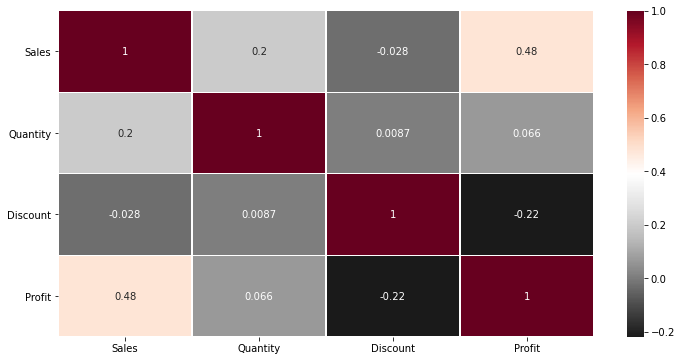

In [15]:
plt.figure(figsize = (12,6))
nc = rt.corr()
sns.heatmap(nc,linewidth = 0.3,annot = True,cmap = 'RdGy_r')
plt.yticks(rotation = 0)
plt.show()

*Sales* and *Profit* are the only entities that are correlated but that too to a meagre extent.In other words, when Sales in Superstore go up by **USD 1**, Profit will increase by **USD 0.48**. This is indicative that this Superstore is a popular company with constant demand of the products sold.

*Discount* and *Profit* have a weak Negative linear correlation. When Discount is increased by 1%, *Profit* will decrease by **USD 0.22**. This is because discount reduces overall sales revenues.

*Quantity* and *Profit* has positive but tending to Zero linear correlation. This indicates that the Superstore may sell a considerable number of products at low profit margins.Profit will increase as Quantity increases, but not on a linear scale.

*Discount* and *Sales* has negative but tending to Zero linear correlation. This indicates that despite targeting to implement discounts as a promotional strategy to successfully increase sales, Superstore couldn't improve Sales significantly.

*Discount* and *Quantity* has positive but tending to Zero linear correlation. This indicates that implementing discounts as Superstore's promotional strategy is not attractive or motivating. 

*Quantity* and *Sales* has quite dull positive linear correlation. When Quantity increase by 1 unit, Sales will increase by **USD 0.20**. Not withstanding, it is nice that they have a positive non-linear relationship.

In [16]:
#creating a function to add labels to bar plots
def add_vlabel(label):
    for p in label.patches:
             label.annotate("%0.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12,fontweight = "bold", color='white', xytext=(0, -7),
                 textcoords='offset points')

In [17]:
def add_vdlabel(label):
    for p in label.patches:
             label.annotate("%0.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12,fontweight = "bold", color='white', xytext=(0, -7),
                 textcoords='offset points')

## Sub-plots of Shipping Modes, Customer Segment, Regions, Categories of Deals being placed in the SuperStore.

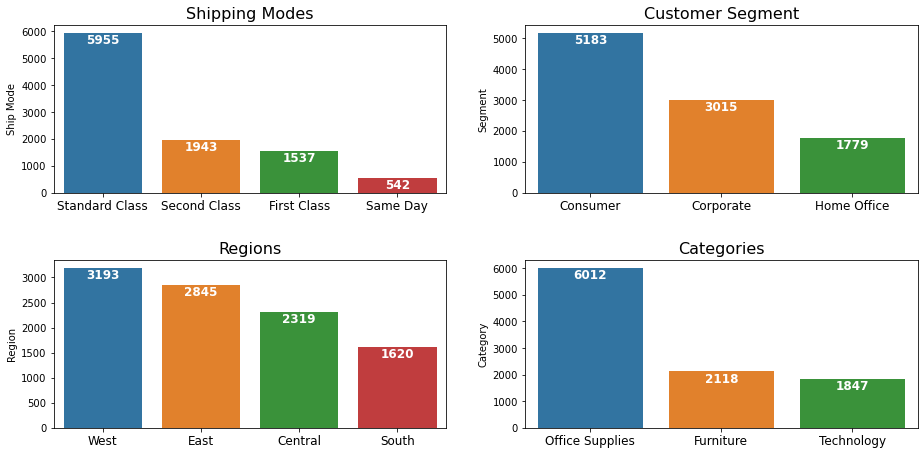

In [18]:
plt.subplots(2,2,figsize = (15,7))


plt.subplot(2,2,1)
sm = rt['Ship Mode'].value_counts()
lbl1 = sns.barplot(y=sm,x = sm.index)
#labelling the bars
add_vlabel(lbl1)
plt.title("Shipping Modes", fontsize = 16)
plt.xticks(fontsize = 12)


plt.subplot(2,2,2)
sg = rt['Segment'].value_counts()
lbl2 = sns.barplot(y = sg, x=sg.index)
plt.title("Customer Segment",fontsize = 16)
plt.xticks(fontsize = 12)
add_vlabel(lbl2)


plt.subplot(2,2,3)
rg = rt['Region'].value_counts()
# plt.figure(figsize = (14,7))
lbl5 = sns.barplot(y = rg, x=rg.index,)
plt.title("Regions",fontsize = 16)
plt.xticks(fontsize = 12)
add_vlabel(lbl5)


plt.subplot(2,2,4)
cy = rt['Category'].value_counts()
# plt.figure(figsize = (14,7))
lbl6 = sns.barplot(y = cy, x=cy.index,)
plt.title("Categories",fontsize = 16)
plt.xticks(fontsize = 12)
add_vlabel(lbl6)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)

plt.show()

### Observations :
1. **Standard Class** is the most preferred mode of *Shipment* followed by **Second Class** and **First Class** resp.
2. In *Customer Segment*, a large chunk of orders is placed by the **Consumers** and then comes **Corporates** and **Home Office**

3. **West**, **East**,**Central** *regions* are ranked 1st,2nd and 3rd respectively. 
4. Among the *Categories* Section,**Office Supplies** are in great demand followed by **Furniture** and **Technology** Category.

## Sub-plots of Top 10 Cities, Top 10 States, Quantities Ordered, Bottom 10 States with respect to Deals happening the SuperStore.

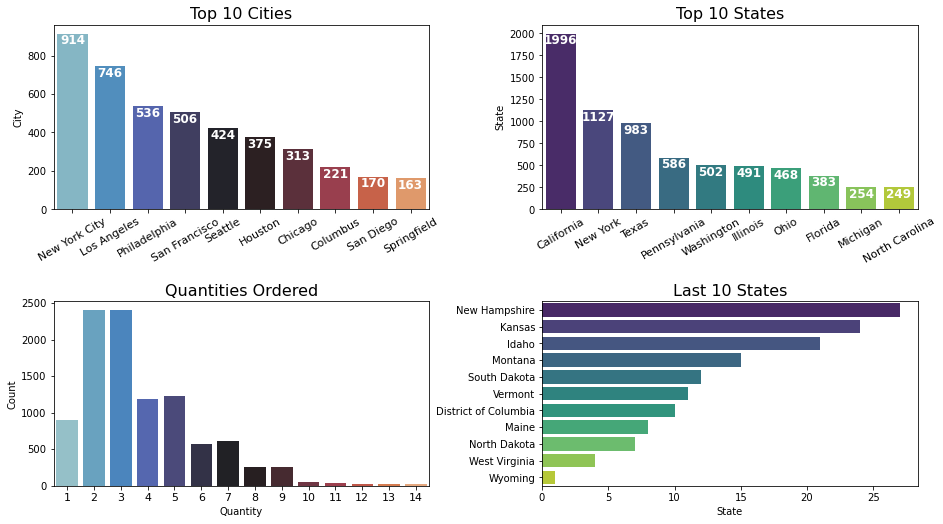

In [19]:
plt.subplots(2,2,figsize = (15,8))


plt.subplot(2,2,1)
ct = rt['City'].value_counts()[:10]
lbl3 = sns.barplot(y = ct, x=ct.index,palette = 'icefire')
plt.title("Top 10 Cities",fontsize = 16)
plt.xticks(rotation=30,fontsize = 11)
add_vlabel(lbl3)


plt.subplot(2,2,2)
st = rt['State'].value_counts()[:10]
# plt.figure(figsize = (14,7))
lbl4 = sns.barplot(y = st, x=st.index,palette = 'viridis')
plt.title("Top 10 States",fontsize = 16)
plt.xticks(rotation=30,fontsize = 11)
add_vlabel(lbl4)


plt.subplot(2,2,3)
ob = rt['Quantity']
ob = ob.to_frame().astype('object').value_counts().to_frame()
ob.reset_index(inplace=True)
ob.columns = ['Quantity','Count']
lbl7 = sns.barplot(x="Quantity", y="Count", data=ob, dodge=False,palette = 'icefire')
plt.title("Quantities Ordered",fontsize = 16)
plt.xticks(rotation=30,fontsize = 11)
plt.xticks(rotation =0)
# add_vlabel(lbl7)



plt.subplot(2,2,4)
st2 = rt['State'].value_counts()[38:]
# plt.figure(figsize = (14,7))
lbl8 = sns.barplot(x = st2, y=st2.index,palette = 'viridis')
plt.title("Last 10 States",fontsize = 16)
# plt.xticks(rotation=50,fontsize = 10)
# add_vlabel(lbl8)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.5)

plt.show()

### Observations : 
    
As we can observe 
    
1. **New York City** places maximum *number of Orders among the Cities* while **Los Angeles** and **Philadelphia** are ranked 2nd  and 3rd respectively.
2. So, **California** has the most *number of Orders among the States* followed by **New York** and **Texas**.
3. In context of Quantities of product being ordered, **'2'** and **'3'** are the most frequent ones that roughly means dominance of *Consumer* type of Customers in Orders being placed.
4. **North Dakota, West Virginia and Wyoming** are among the worst performing states with Wyoming ranked last in context of *Deals happening*.

## **Sub-Category Item Deals and Average price.**

In [20]:
#plt.figure(figsize= (16,7))
scy = rt[['Category','Sub-Category']].value_counts().sort_values(ascending = False)
frame = scy.to_frame()
frame.reset_index(inplace=True)
frame.columns = ['Category', 'Sub-Category', 'Count']

In [21]:
nf = frame.sort_values("Category")
nf.head(3)

,Category,Sub-Category,Count
2,Furniture,Furnishings,956
12,Furniture,Bookcases,228
10,Furniture,Tables,319


### **Deals**

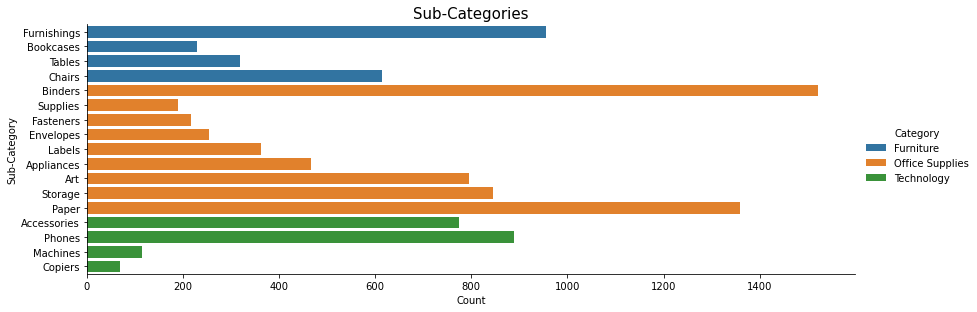

In [22]:
g = sns.catplot(y="Sub-Category", x="Count", hue="Category", data=nf, kind="bar", height = 4, aspect = 3, dodge=False)
plt.title("Sub-Categories",fontsize = 15)

plt.xticks(rotation =0)
plt.show()

Regarding **Sub-Categories**, 

   1. In *Furniture* Category **Furnishings** are getting ordered more frequently followed by **Chairs**.
   2. In *Office Supplies* Category, **Binders** are getting ordered more frequently followed by **Paper**.
   3. In *Technology* Category, **Phones** are getting ordered more frequently followed by **Accessories**.

### **Average prices**

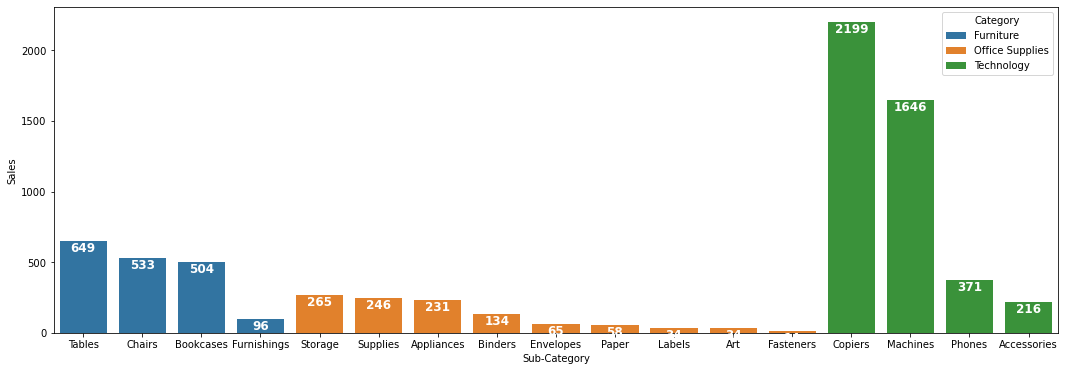

In [23]:
avg_sub = rt.groupby(['Category', 'Sub-Category']).mean().Sales.to_frame().sort_values(['Category','Sales'],ascending=[True,False])
avg_sub.reset_index(inplace = True)
avg_sub

plt.figure(figsize=(18,6))
avg_sub0 = sns.barplot(y= 'Sales',x='Sub-Category',hue = 'Category',data = avg_sub,dodge =False )
add_vlabel(avg_sub0)
plt.show()


### Observations :    

**Copiers and Machines** are significantly expensive than all the other products irrespective of their Category offered by the SuperStore.

Observations for each product category :

1. **Furnitures**
    
    * Tables, chairs, and bookcases are the more expensive Furniture.
    
    * Furnishings is the least expensive.
    

2. **Office Supplies**

    * Storage and supplies are the most expensive sub-categories.

    * Fasteners are the least expensive.

    * Office Supplies is the obvious least expensive category as most of the products are small in size, and have wide availability at many other stores.

    
3. **Technology**
    
    * With the machines and copiers this sub-category being with the notably most expensive products, Technology is the obvious most expensive Category. These require more expensive components and expertise for the manufacturing process.

    * The least expensive is Accessories.
    

## **Sales and Profit**

We'll visualise the overall distribution through a *continuous probability density curve*. This generates two histogram density plots and their continuous probability density curves for *Sales and Profit* in the same figure space, and clearly differentiates them by specifying different colours in its parameters.

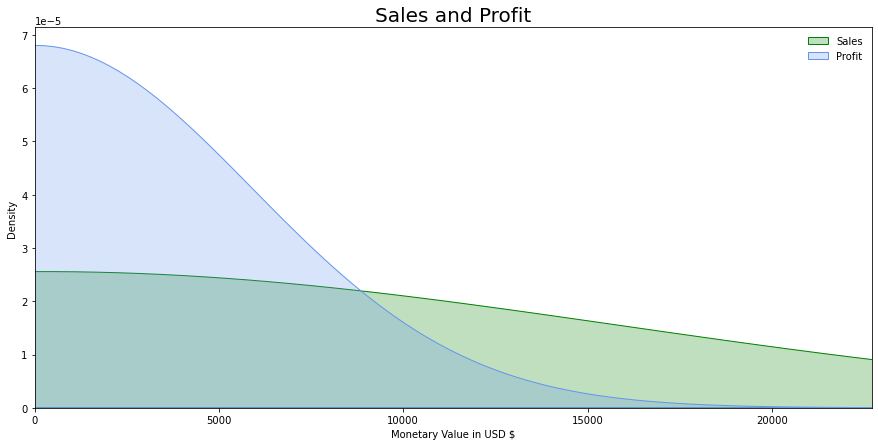

In [24]:
plt.figure(figsize = (15, 7))
# plot Sales and Profit for comparisons
sns.kdeplot(rt['Sales'], color = 'green', label = 'Sales', shade = True, bw = 25)
sns.kdeplot(rt['Profit'], color = 'Cornflowerblue', label = 'Profit', shade = True, bw = 25)
# sns.kdeplot(rt['Discount'], color = 'red', label = 'Discount', shade = True, bw = 25)
plt.xlim([0, 22700])
# plt.ylim([0, 0.00007])
plt.ylabel('Density')
plt.xlabel('Monetary Value in USD $')
plt.title('Sales and Profit', fontsize = 20)
plt.legend(loc = 'upper right', frameon = False) 
plt.show()

Profits are in good amount till sale reaches roughly **USD** $9.5k$ mark, indicating good business. However, profits needs to be improved, above the USD $9.5k$ sales mark.

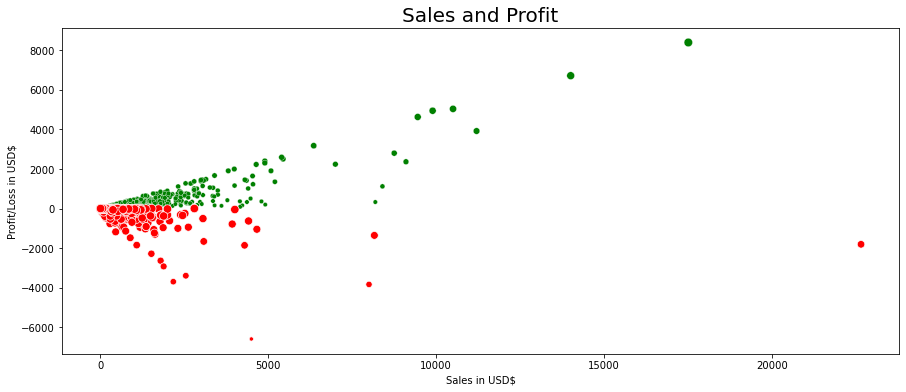

In [25]:
plt.subplots(figsize = (15, 6))
# scatterplot of Sales and Profit

rt_plus = rt[rt.Profit >= 0]
rt_minus = rt[rt.Profit <= 0]
sns.scatterplot(rt_plus["Sales"] , rt_plus["Profit"],color = 'Green', size = rt_plus['Profit'])
sns.scatterplot(rt_minus["Sales"] , rt_minus["Profit"],color = 'Red', size = rt_minus['Profit'])
plt.legend('',frameon=False)
plt.xlabel('Sales in USD$')
plt.ylabel('Profit/Loss in USD$')
plt.title('Sales and Profit', fontsize = 20)
plt.show()

* As we can observe, most of the sales amounted nearly USD 5k each and its most possible reason maybe the Consumer segment.
* A Notable amount of sales happened under USD 3k resulted in making loss and it's one of reason can be high amount of disciunts given by the SuperStore

## **Regionwise Sales,Profit and Discount**

In [26]:
sale_reg = rt.groupby(['Region'])[['Sales', 'Discount', 'Profit']].mean()
sale_reg = sale_reg.reset_index()

sale_reg['Discount'] = sale_reg['Discount']*100
sale_reg.rename(columns={'Discount':'Discount %'},inplace= True)
sale_reg

,Region,Sales,Discount %,Profit
0,Central,215.947759,24.025011,17.100421
1,East,238.465798,14.534271,32.163905
2,South,241.803645,14.725309,28.857673
3,West,227.139254,10.961478,33.927281


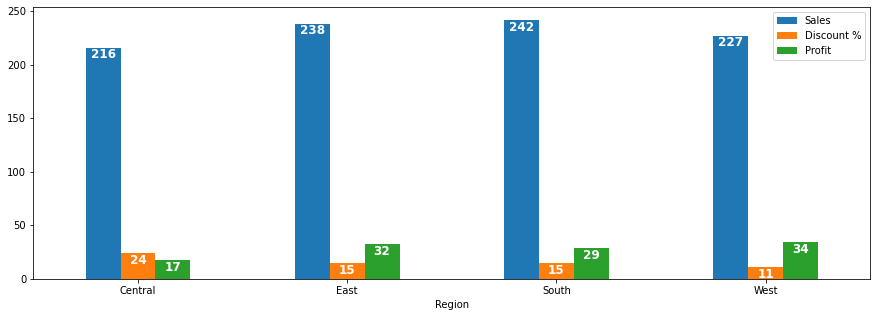

In [27]:
# plt.figure(figsize=(14,7))
q = sale_reg.plot(x = 'Region',kind='bar',figsize=(15,5))
add_vlabel(q)
plt.xticks(rotation = 0)
plt.show()

So, All regions have nearly similar sales but **Southern** region seems having an upper hand and **Western** region seems to bring more profit. Despite giving more discount to **Central** Region they still are the worst performers. 

For Superstore outlets that are newly opened, marketing strategies should be one of the main focus to ensure increasing profitable sales particularly in Central Region and consistent future gains in long term customers.
   

## State-wise Total Sales,Profit and Discount.

In [28]:
rs_sales = rt.groupby(['Region','State']).sum().Sales.to_frame().sort_values(['Sales'],ascending=[False])
rs_sales.reset_index(inplace = True)

rs_pfts = rt.groupby(['Region','State']).sum().Profit.to_frame().sort_values(['Profit'],ascending=[False])
rs_pfts.reset_index(inplace = True)

rs_dsc = rt.groupby(['Region','State']).sum().Discount.to_frame().sort_values(['Discount'],ascending=[False])
rs_dsc.reset_index(inplace = True)

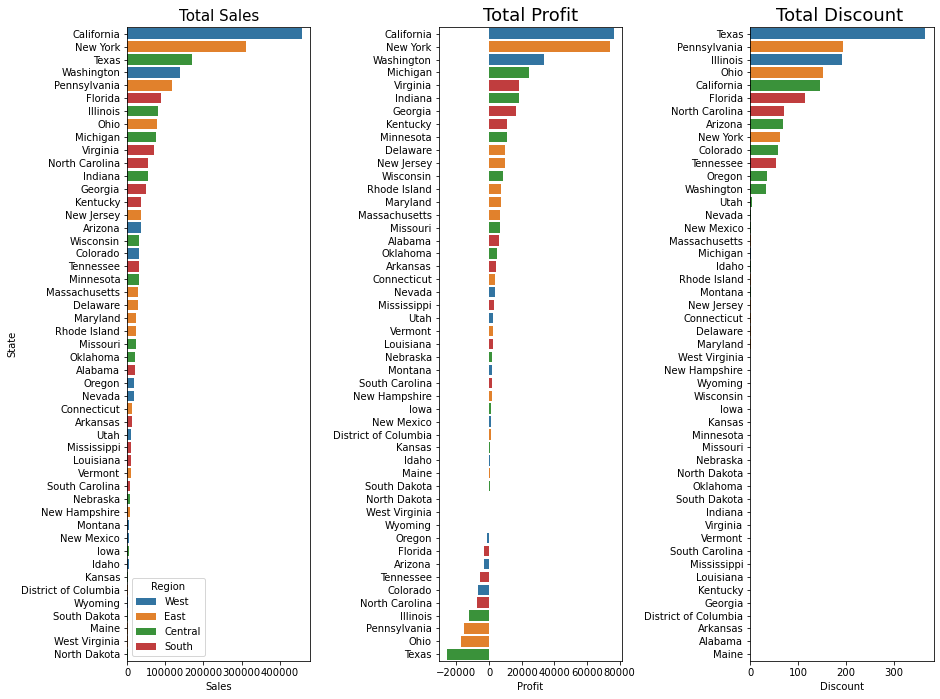

In [29]:
plt.subplots(1,3,figsize = (14,11))

plt.subplot(1,3,1)
g = sns.barplot(y="State", x="Sales", hue="Region", data=rs_sales,dodge=False,)
plt.title("Total Sales",fontsize = 15)
# plt.legend(fontsize = 12)
plt.xticks(rotation =0)
# plt.tick_params(length=0, axis='x')
# plt.show()


plt.subplot(1,3,2)
# plt.figure(figsize = (14,16))
sns.barplot(y="State", x="Profit", hue="Region", data=rs_pfts, dodge=False)
plt.title("Total Profit",fontsize = 18)
plt.legend('',frameon = False)
# plt.xticks(rotation =0,fontsize= 12)
# plt.yticks(fontsize= 12)
plt.ylabel("")

plt.subplot(1,3,3)
sns.barplot(y="State", x="Discount", hue="Region", data=rs_dsc, dodge=False)
plt.title("Total Discount ",fontsize = 18)
plt.legend('',frameon = False)
# plt.xticks(rotation =0,fontsize= 12)
# plt.yticks(fontsize= 12)
plt.ylabel("")
# plt.show()

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.7, hspace=0.4)
plt.show()

##  State-wise Average Sales,Profit and Discount.

In [30]:
ass = rt.groupby(['Region','State']).mean().Sales.to_frame().sort_values(['Sales'],ascending=[False])
ass.reset_index(inplace = True)

asp = rt.groupby(['Region','State']).mean().Profit.to_frame().sort_values(['Profit'],ascending=[False])
asp.reset_index(inplace = True)

asd = rt.groupby(['Region','State']).mean().Discount.to_frame().sort_values(['Discount'],ascending=[False])
asd.reset_index(inplace = True)

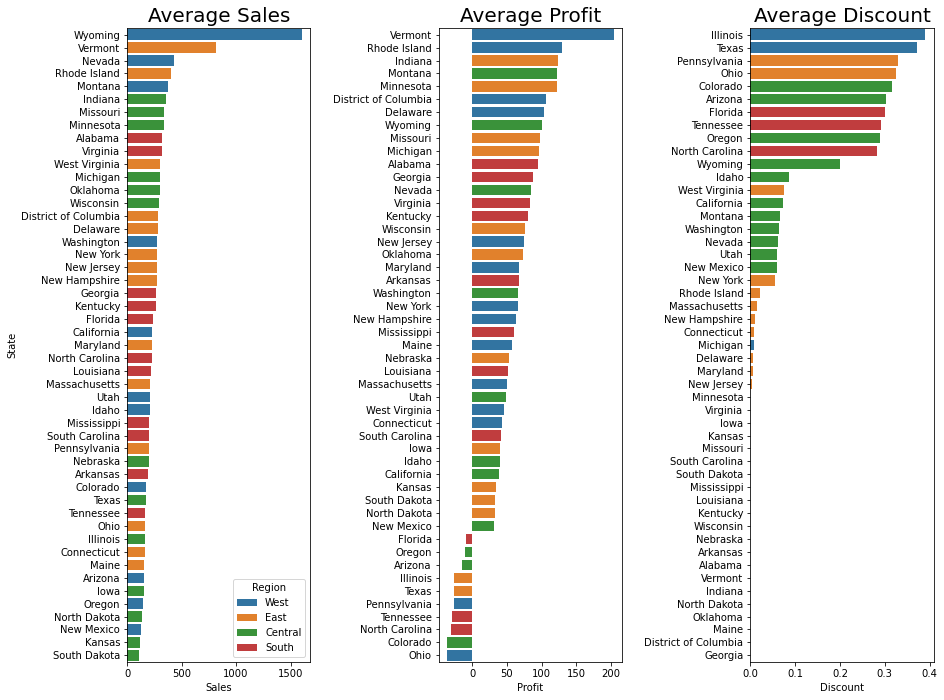

In [31]:
plt.subplots(1,3,figsize = (14,11))

plt.subplot(1,3,1)
sns.barplot(y="State", x="Sales", hue="Region", data=ass, dodge=False)
# plt.ylabel('Average Discount')
# plt.xlabel('American States')
plt.title('Average Sales', fontsize = 20)
# plt.show()


plt.subplot(1,3,2)
sns.barplot(y="State", x="Profit", hue="Region", data=asp, dodge=False)
# plt.ylabel('Average Discount')
# plt.xlabel('American States')
plt.title('Average Profit', fontsize = 20)
plt.legend('',frameon = False)
plt.ylabel("")
# plt.show()

plt.subplot(1,3,3)
sns.barplot(y="State", x="Discount", hue="Region", data=asd, dodge=False)
# plt.xlabel('American States')
plt.title('Average Discount', fontsize = 20)
plt.legend('',frameon = False)
plt.ylabel("")
# plt.show()


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.7, hspace=0.4)
plt.show()

## Observations from Sub-plot of Total Sales,Profit and Discount Offered with respect to States.


1). In **Sales** top performers were *California, New York and Texas* Respectively.

2). In **Profitable** States top performers were *California.New York and Washington*. On the other hand *Texas* state caused maximum loss to the SuperStore Sales following them were *Ohio* and *Pennsylvania* resp.

3).In **Discount** Offered Texas state was offered goods a whooping discount and then Pennsylvania and Illinois with almost the same percentage of discount but less than the maximum one and after them Ohio ranked third.

In [32]:
for i in rt.values:
    if (i[4] == "Wyoming"):
        print("Sale of USD",i[9])

Sale of USD 1603.136


## Observations from Sub-plot of Average Sales,Profit and Discount Offered with respect to States.
    
1). In **Sales** top performers were *Wyoming, Vermont, Nevada and Rhode Island* Respectively. The most probable reason behind the behaviour of Wyoming is that theyve place only a single order from the SuperStore and Hence this behaviour.

2). In **Profitable** States top performers were *Rhode Island,Vermont and Indiana*. On the other hand *Ohio* state caused maximum loss to the SuperStore Sales following them were *Colorado* and *North Carolina* resp.

3). In **Discount** Offered, *Illinois* state was offered goods a remarkable average discount and then *Texas* ranked 2nd & after them *Pennsylvania* ranked third.

### **Inferences:**
* *Illinois,Texas,Pennsylvania,Ohio,Colorado,Arizona,Florida,Tennessee,Oregon,North Carolina* are the Top 10 Average Discount offerinng States and these are the same States which are responsible for the **Losses** to the SuperStore and even *Average Sales* ofered by theese States aren't significant . So, SuperStore should alter their policies while dealing with these States.

* Despite Offering Almost negligible discount in Sales of goods *Vermont,Rhode Island,Indiana, District of Columbia,Minnesota,Delaware,Missouri,Michigan* they still are in the Top 10 **Profit** making Sates for the SuperStore.So SuperStore should try to ramp up sales for more and more profit.

# Average sales and profit and %Discount in Categories.

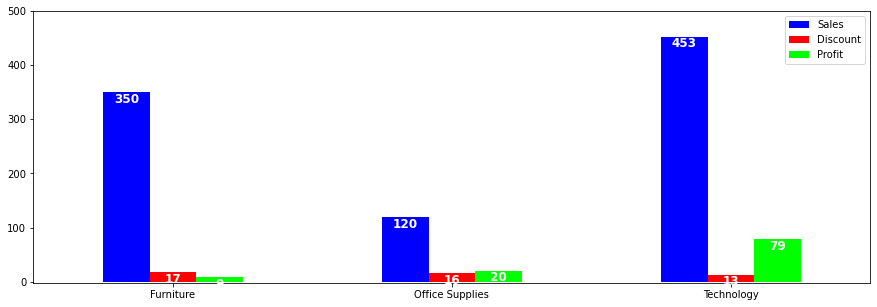

In [33]:
avg_cat = rt.groupby(['Category'])[['Sales', 'Discount', 'Profit']].mean()
avg_cat.reset_index(inplace = True)
avg_cat['Discount'] = avg_cat['Discount']*100
avg_cat.rename(columns={'Discount':'Discount %'})

avg_cat0 = avg_cat.plot(x = 'Category',kind='bar',figsize=(15,5),colormap="brg")
plt.ylim([-2, 500])
plt.xticks(rotation = 0)
plt.xlabel('')
add_vlabel(avg_cat0)
plt.show()

## Observations :
* The **Technology** business is the obvious most popular category, as well as makes the most profits. With emerging trends towards newer technologies, this business is a fast growing and rapidly advancing area for the near future.

* **Office Supplies** is meagrely profitable in terms of profit margin. Superstore is advised to improve on its notably low sales, such as through marketing strategies, in order to increase profits.

* **Furniture** seems considerably popular with but profits are dangerously low. This may be due to more expensive shipping costs as Furnitures are the most heavy and bulky products offereda and remarkable percentage of discount ooffered.

## Average sales Profit/Loss among Sub-Categories

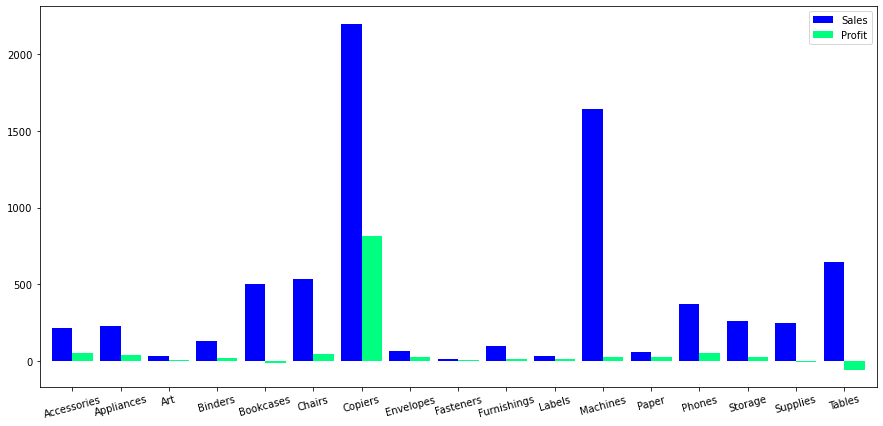

In [34]:
avg_scat = rt.groupby(['Sub-Category'])[['Sales', 'Discount', 'Profit']].mean()
avg_scat.reset_index(inplace = True)
avg_scat['Discount'] = avg_scat['Discount']*100
avg_scat.rename(columns={'Discount':'Discount %'},inplace = True)

avg_scat0 = avg_scat[['Sub-Category','Sales', 'Profit']].plot(x='Sub-Category',kind='bar',figsize=(15,7),colormap="winter", width=0.85)

# plt.ylim([-2, 500])
plt.xticks(rotation = 15)
plt.xlabel('')
# add_vlabel(avg_scat0)
plt.show()

# Average discount on Sub-Categories

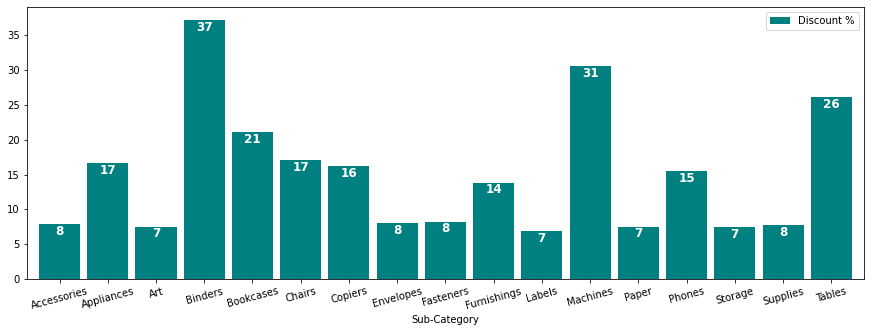

In [35]:
avg_scatd= avg_scat[['Sub-Category','Discount %']].plot(x='Sub-Category',kind='bar',figsize=(15,5),color = 'teal', width=0.85)
plt.xticks(rotation = 15)
add_vlabel(avg_scatd)

## Observations for each product category :

1) **Furnitures**

> *Tables* suffer the most losses, despite its highest sales. This may be because it offers the third highest average discount of nearly 26%.

>*Bookcases* are also loss-bearing despite its high sales. This may be because it offers the fourth highest average discount of nearly 21%.

>The overall performance of *Chairs* is observed to generate the highest profits from its high sales, despite giving out relatively high average discounts of almost 17%.

>Regarding *Furnishings*, it is worst performing among Furnitures Sub-Category with extremely low Sales and negligible profits.

Furnitures category overall has the highest average discounts, which lowers its profitability in terms of both profits and profit margins.

2) **Office Supplies**

>*Binders* have the highest average discounts of around 37%, which lowers its profitability in terms of both profits and profit margins.

>*Art,Envelopes, Fasteners,Label and Paper* are the products whose Sales need to be improved and maybe SuperStore can increase discount offered for the same.

Overall, all sub-categories have reasonable profit margins.

3) **Technology**

>*Machine* has the lowest profit margin as its notably high sales only bring in almost negligible profits. This may be because it has the second highest average discounts at 30-31%

>*Copiers* have the highest sales and profit value. This may be because it offers relatively low average discounts of 16% on average.

>*Phone* and *Accessories* have profits despite lower sales, as compared to similar profits gained from Chairs, Appliances, and Machines. Profit margins are good.

This Category has the highest overall sales and profits.

# Average sales Profit/Loss of Customer Segment

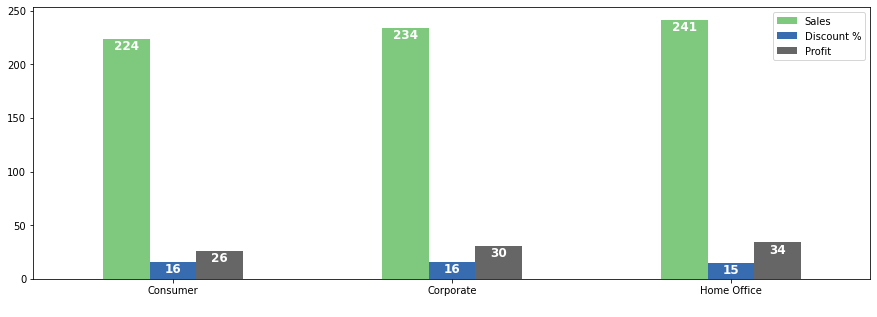

In [36]:
avg_cust = rt.groupby(['Segment'])[['Sales', 'Discount', 'Profit']].mean()
avg_cust.reset_index(inplace = True)
avg_cust['Discount'] = avg_cust['Discount']*100
avg_cust.rename(columns={'Discount':'Discount %'},inplace = True)

avg_cust0 = avg_cust.plot(x = 'Segment',kind='bar',figsize=(15,5),colormap="Accent")
# plt.ylim([-2, 500])
plt.xticks(rotation = 0)
plt.xlabel(' ')
add_vlabel(avg_cust0)
plt.show()

*Home Office* Products have the Maximum Contribution in sales and followed by *Corporate* and *Consumers*. Discount offered to each Segment of Customers is nearly the same. Profits from the Customer Segment seem proportional to the Sales made by particular Segment.

# Profit/Loss by Sales and %Discount Level

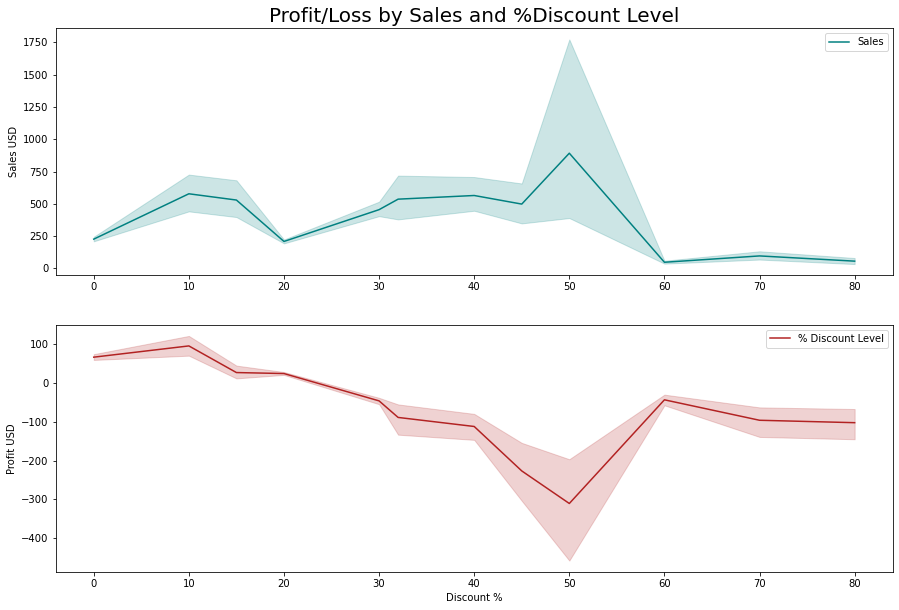

In [37]:
dl = rt.copy()
dl['Discount'] = dl['Discount']*100
dl.rename(columns={'Discount':'Discount %'},inplace = True)


plt.subplots(2,1,figsize = (15,10))

plt.subplot(2,1,2)
# plt.figure(figsize = (14, 5))
sns.lineplot('Discount %', 'Profit', data = dl, color = 'FireBrick', label = '% Discount Level')
plt.ylabel('Profit USD')
# plt.title('Profit/Loss by %Discount Level', fontsize = 20)

plt.subplot(2,1,1)
sns.lineplot('Discount %', 'Sales', data = dl, color = 'Teal', label = 'Sales')
plt.ylabel('Sales USD')
plt.xlabel('')
plt.title('Profit/Loss by Sales and %Discount Level', fontsize = 20)

plt.show()

## Observations :
 Losses will likely to occur for higher discount levels above 20%. In other words, between 0% and 20% of discounts, a profit can be made by reducing the occurences of lowered prices after discount deductions. Even, higher discounts likely also encourage bad consumer psychology, instead of targeting to implement discounts as a promotional strategy to successfully increase sales. A considerable number of customers may develop the thinking that Superstore's products are defective or low quality. In a long run, this can negatively affect Superstore's brand image. All in all, Superstore is advised to consider other promotional strategies.

The worst losses occured when discount approximates 50%. This may indicate festivals, end-of-season sales, and clearance sales for older designs.
    
Superstore is most profitable when discount levels lower than 10% are offered. This allows less occurences of lowered prices after discount deductions, and thus larger profit margins and profits.

# Finding the weak areas to work to make more profit
**Overall Discount Sales and Profit**

* Customers tend to spend more when there are discounts ranging 40 to 60% and above this the Sales again reduces.However, discounts will affect profits. the sale of a discounted product results in a huge amount of loss as compared to a sale of a non-discounted product, 

* Despite this, the Superstore cannont escape from giving out discounts on their products, especially during festivals, end-of-season sales, and clearance sales that are necessary to make space in their warehouses for newer and more current stocks. Instead, Superstore is advised to reduce overall discount levels to minimise losses, and focus on implementing other promotional strategies to ensure increasing profitable sales and consistent future gains in long term customers.

* They should also encourage Customers to Shop for more than USD 5K as majority of Sales happening under 5k result in Losses.

**Region and States**

* SuperStore should try to enhance Sales in States namely Ilinois,Texas,Pennsylvania,Ohio,Colorado,Arizona,Florida,Tennessee,Oregon,North Carolina and also consdering not to offer Discount more than 35% as it eventually results in Huge Losses despite Sales going up.

* Region wise, focus on Central region is required and try to improve sales and reducing discounts.

**Categories** 

* SuperStore should try to enhance the Sales of Office Supplies Categories and somewhat reduce the percentage of discount offered.

**Segment**

* Encourage Coporate and Home Office Segment to Shop more as they inturn result in Huge Profits and high Sales and try to increase Customers among them.

Thank you!